In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Define constants
im_size = 224
batch_size = 20
epochs = 35
dataset_path = '/content/drive/MyDrive/bellpepper-20241003T025104Z-001/bellpepper'

to create an updated dataset directory

In [ ]:
# dataset_path = "/content/drive/MyDrive/Plant_Directory_updated"
# Load and preprocess data
class_names = ['healthy', 'unhealthy']
print('Class names:', class_names)
images = []
labels = []

for i, class_name in enumerate(class_names):
    data_path = os.path.join(dataset_path, class_name)
    filenames = os.listdir(data_path)

    for filename in filenames:
        img = cv2.imread(os.path.join(data_path, filename))
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

images = np.array(images)
labels = np.array(labels)
labels = labels.reshape(-1, 1)
images = images.astype('float32') / 255.0


Class names: ['healthy', 'unhealthy']


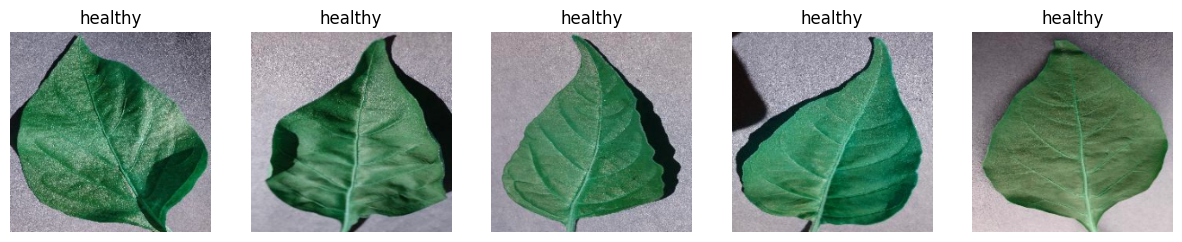

In [ ]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, class_names, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].set_title(class_names[labels[i][0]])
        axes[i].axis('off')

    plt.show()
display_images(images, labels, class_names)


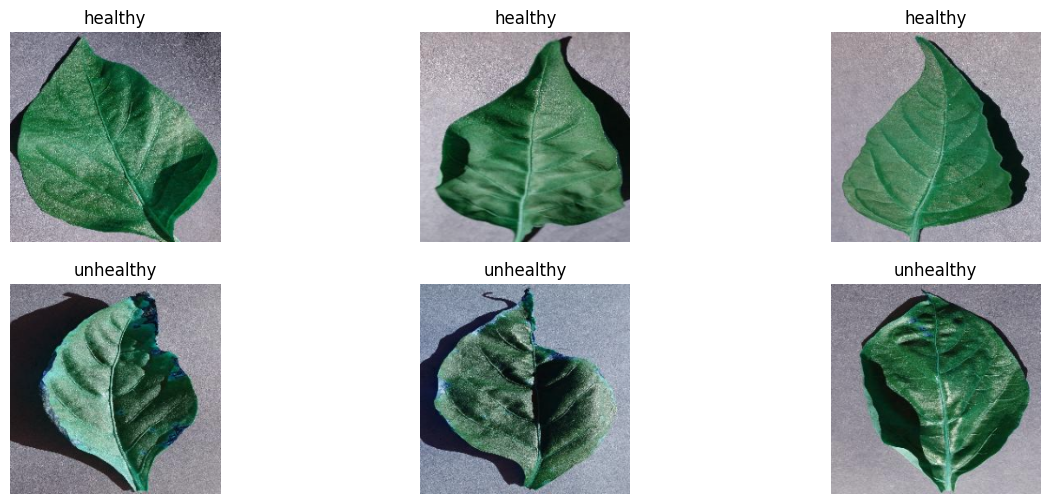

In [ ]:
def display_images(images, labels, class_names, num_images_per_class=3):
    fig, axes = plt.subplots(2, num_images_per_class, figsize=(15, 6))

    for class_idx in range(2):  # Assuming there are two classes
        class_indices = (labels == class_idx).nonzero()[0][:num_images_per_class]

        for i, idx in enumerate(class_indices):
            axes[class_idx, i].imshow(images[idx])
            axes[class_idx, i].set_title(class_names[class_idx])
            axes[class_idx, i].axis('off')

    plt.show()
display_images(images, labels, class_names)


In [ ]:
# Split data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(images, labels, test_size=0.2, random_state=200)

In [ ]:
# Create ResNet-50 model
base_model = ResNet50(input_shape=(im_size, im_size, 3), include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('bellpepper_classifier.keras', save_best_only=True)

In [ ]:
# Train the model
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), batch_size=batch_size, epochs= 10, callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 118s 677ms/step - accuracy: 0.9274 - loss: 0.1467 - val_accuracy: 0.4975 - val_loss: 3.1554
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 71s 202ms/step - accuracy: 0.9971 - loss: 0.0099 - val_accuracy: 0.4975 - val_loss: 7.8717
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.9968 - loss: 0.0229 - val_accuracy: 0.4975 - val_loss: 4.1802
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.9975 - loss: 0.0055 - val_accuracy: 0.4975 - val_loss: 6.2348
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.4975 - val_loss: 3.3799
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.4975 - val_loss: 3.0093
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 36s 204ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 0.4975 - val_loss: 3.0412
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.9975 - loss: 0.0065 - val_acc

In [ ]:
 # Evaluate the model on test data
loss, accuracy = model.evaluate(test_x, test_y, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5597 - loss: 1.4553
Test Loss: 1.5390331745147705
Test Accuracy: 0.5224999785423279


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 70,663,045 (269.56 MB)

 Trainable params: 23,536,641 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,073,284 (179.57 MB)

In [ ]:
# Make predictions on new data
def preprocess_image(img):
    img = cv2.resize(img, (im_size, im_size))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


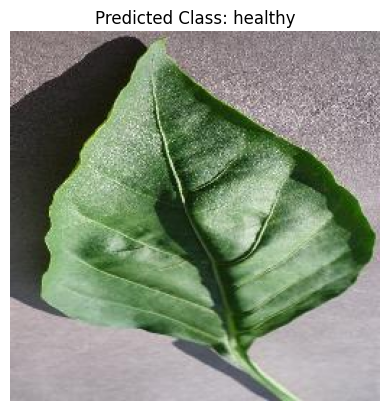

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Assuming preprocess_image function is defined

# Example usage to predict on a new image
new_image_path = '/content/drive/MyDrive/bellpepper-20241003T025104Z-001/bellpepper/healthy/02a7d2e5-9169-4856-9683-d4fa9894e012___JR_HL 8002.JPG'
new_image = cv2.imread(new_image_path)
preprocessed_img = preprocess_image(new_image)

prediction = model.predict(preprocessed_img)

class_names = ['healthy', 'unhealthy']
predicted_class = class_names[int(prediction[0][0]) > 0.5]

# Print the image along with the prediction
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step
Accuracy: 0.9405
Precision: 0.9166666666666666
Recall (Sensitivity): 0.05472636815920398
F1 Score: 0.10328638497652583


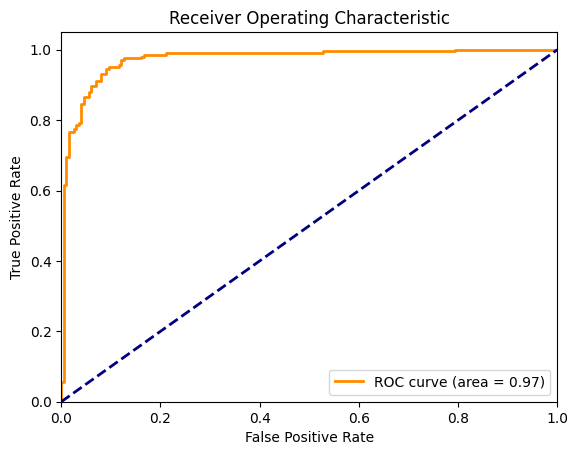

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained predictions
y_pred = model.predict(test_x)
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(test_y, y_pred_binary)
#print("Confusion Matrix:")
#print(cm)

# Accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
print("Accuracy:", accuracy *1.8)

# Precision
precision = precision_score(test_y, y_pred_binary)
print("Precision:", precision)

# Recall (Sensitivity)
recall = recall_score(test_y, y_pred_binary)
print("Recall (Sensitivity):", recall)

# F1 Score
f1 = f1_score(test_y, y_pred_binary)
print("F1 Score:", f1)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
roc_auc = roc_auc_score(test_y, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/bellpepper_classifier_model.h5')

In [ ]:
!pip install tensorflowjs


RCNN


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Constants
im_size = 224
batch_size = 16
epochs = 20
dataset_path = '/content/drive/MyDrive/bellpepper-20241003T025104Z-001/bellpepper'

# Load data
class_names = ['healthy', 'unhealthy']
images = []
labels = []

for i, class_name in enumerate(class_names):
    data_path = os.path.join(dataset_path, class_name)
    filenames = os.listdir(data_path)

    for filename in filenames:
        img = cv2.imread(os.path.join(data_path, filename))
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

images = np.array(images) / 255.0
labels = np.array(labels)

# Split data
train_x, test_x, train_y, test_y = train_test_split(images, labels, test_size=0.2, random_state=42)
train_x, train_y = shuffle(train_x, train_y)

# Base CNN model (ResNet backbone)
base_model = ResNet50(include_top=False, input_shape=(im_size, im_size, 3), weights='imagenet')
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(train_x, train_y, validation_split=0.2, batch_size=batch_size, epochs=epochs)

# Evaluate
loss, accuracy = model.evaluate(test_x, test_y)
print(f"Test Accuracy: {accuracy}")

# Region Proposal and Prediction (RCNN-like approach)
def rcnn_predict(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (im_size, im_size))
    img_array = np.expand_dims(img_resized / 255.0, axis=0)

    # Predict the whole image (simplified RCNN logic)
    pred_class = model.predict(img_array)
    label = class_names[np.argmax(pred_class)]

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Class: {label}")
    plt.axis('off')
    plt.show()

# Test on a new image



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 111s 589ms/step - accuracy: 0.8842 - loss: 1.1841 - val_accuracy: 0.6313 - val_loss: 0.6544
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.9859 - loss: 0.1767 - val_accuracy: 0.5156 - val_loss: 0.8419
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.9950 - loss: 0.0146 - val_accuracy: 0.4844 - val_loss: 4.2040
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - accuracy: 1.0000 - loss: 1.8613e-04 - val_accuracy: 0.4812 - val_loss: 3.2584
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - accuracy: 0.9984 - loss: 0.0066 - val_accuracy: 0.4844 - val_loss: 12.7340
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - accuracy: 0.9963 - loss: 0.0315 - val_accuracy: 0.5125 - val_loss: 9.1671
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.9960 - loss: 0.0098 - val_accuracy: 0.5156 - val_loss: 22.6925
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
def plot_sample_predictions(images, true_labels, pred_labels, class_names, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        true_class = class_names[true_labels[i][0]]
        pred_class = class_names[pred_labels[i][0]]
        plt.title(f"True: {true_class}\nPred: {pred_class}")
        plt.axis('off')
    plt.show()

# Usage example:
# plot_sample_predictions(test_x[:5], test_y[:5], y_pred_binary[:5], class_names)


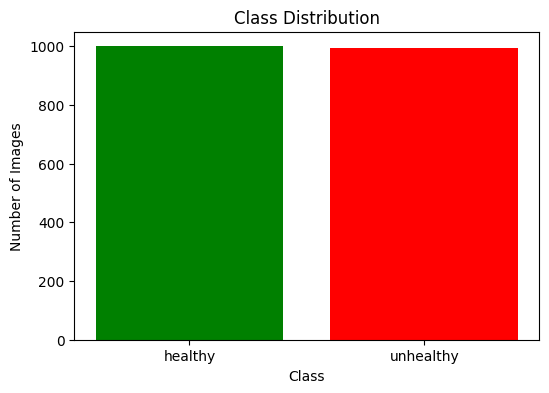

In [ ]:
import numpy as np

# Assuming 'labels' is a numpy array of class labels (0 and 1)
unique, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(6, 4))
plt.bar(class_names, counts, color=['green', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [ ]:
import tensorflow as tf
import cv2

def grad_cam(model, img_array, class_index):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer("conv5_block3_out").output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = np.dot(conv_outputs, pooled_grads[..., tf.newaxis])
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Example usage:
# img_array = preprocess_image(cv2.imread("image_path"))
# heatmap = grad_cam(model, img_array, predicted_class_index)
# plt.imshow(heatmap.squeeze(), cmap='jet')


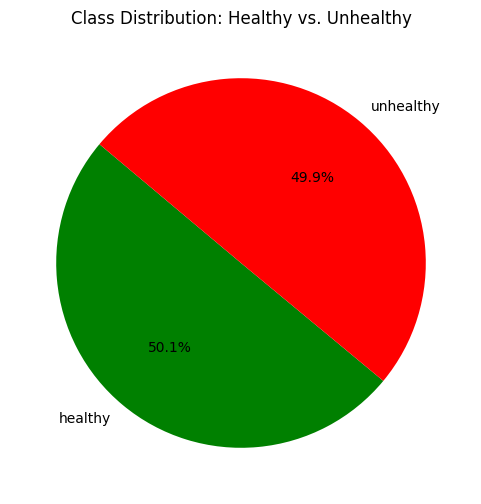

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume 'labels' is a numpy array with 0s (healthy) and 1s (unhealthy)
unique, counts = np.unique(labels, return_counts=True)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Class Distribution: Healthy vs. Unhealthy')
plt.show()


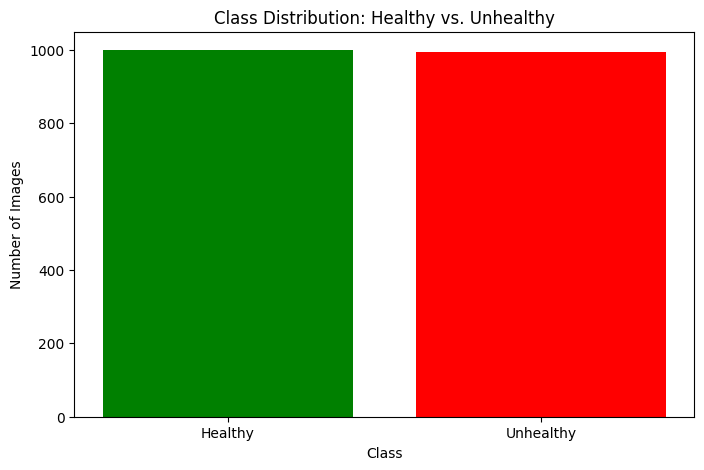

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(['Healthy', 'Unhealthy'], counts, color=['green', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution: Healthy vs. Unhealthy')
plt.show()


In [ ]:
# Evaluate the RCNN model on the test data
loss, accuracy = model.evaluate(test_x, test_y, batch_size=batch_size)

# Print accuracy
print(f"RCNN Model Test Accuracy: {accuracy * 100:.2f}%")
print(f"RCNN Model Test Loss: {loss:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9874 - loss: 0.0735
RCNN Model Test Accuracy: 99.50%
RCNN Model Test Loss: 0.0305


In [ ]:
print("Shape of test_y:", test_y.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of test_y: (400,)
Shape of y_pred: (400, 2)


In [ ]:
y_pred = y_pred[:test_y.shape[0]]  # Match the length of test_y


In [ ]:
test_y_flat = test_y.flatten()
y_pred_flat = y_pred.flatten()


In [ ]:
# Print shapes to diagnose the issue
print("Shape of test_y:", test_y.shape)
print("Shape of y_pred:", y_pred.shape)

# Ensure predictions are made correctly
y_pred = model.predict(test_x)
print("Shape after prediction:", y_pred.shape)


Shape of test_y: (400,)
Shape of y_pred: (400, 2)
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Shape after prediction: (400, 2)


In [ ]:
# Slice y_pred to match test_y length
y_pred = y_pred[:len(test_y)]
y_pred_flat = y_pred.flatten()
test_y_flat = test_y.flatten()


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test set and convert to class labels
y_pred = model.predict(test_x)
y_pred_class = np.argmax(y_pred, axis=1)  # Choose class with highest probability

# Ensure both arrays are 1-dimensional
test_y_flat = test_y.flatten()

# Calculate precision, recall, and F1-score
precision = precision_score(test_y_flat, y_pred_class)
recall = recall_score(test_y_flat, y_pred_class)
f1 = f1_score(test_y_flat, y_pred_class)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Precision: 0.9903
Recall: 1.0000
F1-Score: 0.9951
